Taxi Rides Dataset

Data fields

- id: a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Calculate the average trip duration grouped by the passengers and vendors

In [2]:
z = df.groupby(['passenger_count', 'vendor_id'])['trip_duration'].mean()
z

passenger_count  vendor_id
0                1             417.903226
                 2            3108.655172
1                1             821.741880
                 2            1054.370695
2                1             948.028662
                 2            1050.236334
3                1             929.034783
                 2            1089.823131
4                1             979.863697
                 2            1106.984629
5                1             970.825581
                 2            1070.672026
6                1            1144.342105
                 2            1061.093419
7                2              19.666667
8                2             104.000000
9                2             560.000000
Name: trip_duration, dtype: float64

Make three plots that shows across all the passenger counts

- histogram for the vendors with max avg trip duration per passenger_count(example: if you have a total of 5 passenger_counts  and vendor 1 was the max in 3 of them and vendor two was max in 2, then the histogram should show vendor 1 with count of 3,and vendor 2 with count of 2)
- histogram for the vendors with min avg trip duration per passenger_count
- the difference of avg duration between the max and the min avag pay for each passenger_count on a bar plot

In [3]:
z = z.reset_index()
P = z.passenger_count.unique()
max_array = []
min_array = []
diff_array = []
for p in P:
    index_max_trip_time = z[z.passenger_count==p]['trip_duration'].values.argmax()
    max_array.append(z[z.passenger_count==p].iloc[index_max_trip_time]['vendor_id'])
    index_min_trip_time = z[z.passenger_count==p]['trip_duration'].values.argmin()
    min_array.append(z[z.passenger_count==p].iloc[index_min_trip_time]['vendor_id'])
    diff_array.append(z[z.passenger_count==p].max()['trip_duration']-z[z.passenger_count==p].min()['trip_duration'])



<BarContainer object of 10 artists>

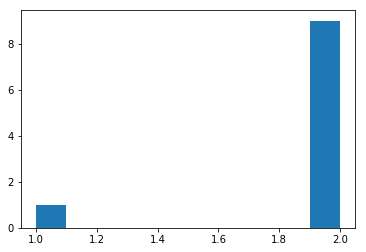

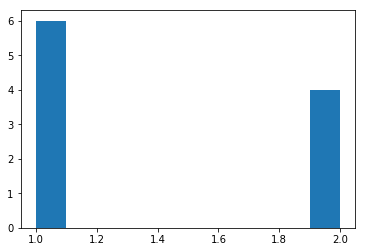

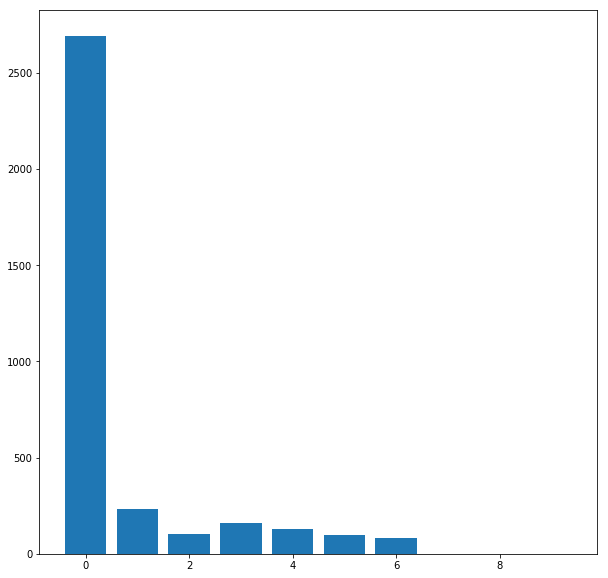

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(max_array)
plt.figure()
plt.hist(min_array)
plt.figure(figsize=[10,10])
plt.bar(P, diff_array)